# SVM FROM SCRATCH  
hard margin no kernel

In [40]:
import numpy as np

class SVM():

    def __init__(self, learning_rate = 0.001, lambda_param = 0.01, n_iters = 1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # transform y label from 0,1 to -1,1 for SVM classifer
        y_ = np.where(y <= 0, -1, 1)

        # initialize weights and bais
        self.w = np.random.normal(loc=0.0, scale=0.01, size=(n_features,))
        self.b = 0

        # training loop
        for _ in range(self.n_iters):

            # SGD for optimaztion
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]


    def predict(self, X):
        y_pred = np.dot(X, self.w) - self.b

        return np.sign(y_pred)
    
    def accuracy(self, y_pred, y_test):
        accuracy = np.sum(y_test == y_pred) / len(y_test)
        return accuracy
    
    

## Test with data

In [20]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

In [41]:
X, y = datasets.make_blobs(n_samples=50, n_features=2, centers=2, cluster_std=1.05, random_state=40)
y = np.where(y == 0, -1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)


In [42]:
model = SVM()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = model.accuracy(y_pred, y_test)
print(f'SVM Model Accuracy is:{accuracy}')

SVM Model Accuracy is:1.0


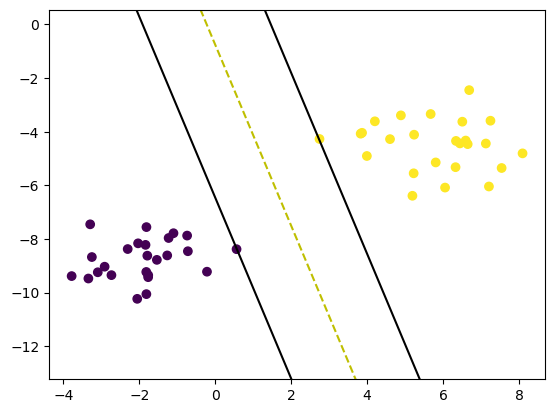

In [44]:
def visualize_svm():
    def get_hyperplane_value(x, w, b, offset):
        return (-w[0] * x + b + offset) / w[1]

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    plt.scatter(X[:, 0], X[:, 1], marker="o", c=y)

    x0_1 = np.amin(X[:, 0])
    x0_2 = np.amax(X[:, 0])

    x1_1 = get_hyperplane_value(x0_1, model.w, model.b, 0)
    x1_2 = get_hyperplane_value(x0_2, model.w, model.b, 0)

    x1_1_m = get_hyperplane_value(x0_1, model.w, model.b, -1)
    x1_2_m = get_hyperplane_value(x0_2, model.w, model.b, -1)

    x1_1_p = get_hyperplane_value(x0_1, model.w, model.b, 1)
    x1_2_p = get_hyperplane_value(x0_2, model.w, model.b, 1)

    ax.plot([x0_1, x0_2], [x1_1, x1_2], "y--")
    ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], "k")
    ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], "k")

    x1_min = np.amin(X[:, 1])
    x1_max = np.amax(X[:, 1])
    ax.set_ylim([x1_min - 3, x1_max + 3])

    plt.show()

visualize_svm()